# Welcome to the AI-Smörgåsbord
Lets see whats on the table...


<div style="text-align: center;">
<img src='../images/smargasbord.png' width='500' height='500'>
</div>


In [36]:
#imports
import os
from open_agent import OpenAgent
from config import Config
import pygame
from PIL import Image
from IPython.display import display
from pydantic import BaseModel 
from pydantic_core import from_json

# Create an Agent
This will create an agent that is capable of talking to the OpenAI APIs

In [4]:
agent = OpenAgent(api_key=Config.api_key)

In [5]:
def play_sound(file):
    pygame.mixer.init()
    pygame.mixer.music.load(file)
    pygame.mixer.music.play()
    # while pygame.mixer.music.get_busy():
    #     pygame.time.Clock().tick(10)

# Text to speach
We are able to take text and convert it into speach, lets try that


In [6]:
text = 'Who knows what AI will be able to do in the future?'
target_file_name = '../data/aimagic.mp3'
agent.text_to_speach(text=text, target_file_name=target_file_name)
print('done generating file, lets play it')






done generating file, lets play it


In [7]:
# Get full path to the file and play it
full_path = os.path.abspath(target_file_name)
play_sound(full_path)

# Transcribe text from an audio file
Lets see if we can take an audio file and convert it back to text

In [8]:
response = agent.transcribe(full_path)
print(response)

Who knows what AI will be able to do in the future?


# Translate text
Lets translate a piece of text

In [10]:
text='The meaning of life is forty two'
response = agent.translate_text(text=text, target_language='german')
print(response)

#Also lets let it speak the translation
target_file_name = '../data/aimagic2.mp3'
agent.text_to_speach(text=response, target_file_name=target_file_name)
print('done generating file, lets play it')

# Get full path to the file and play it
full_path = os.path.abspath(target_file_name)
play_sound(full_path)

Der Sinn des Lebens ist zweiundvierzig.
done generating file, lets play it


# Generate images
Lets generate an image using a prompt

done generating file, lets display it


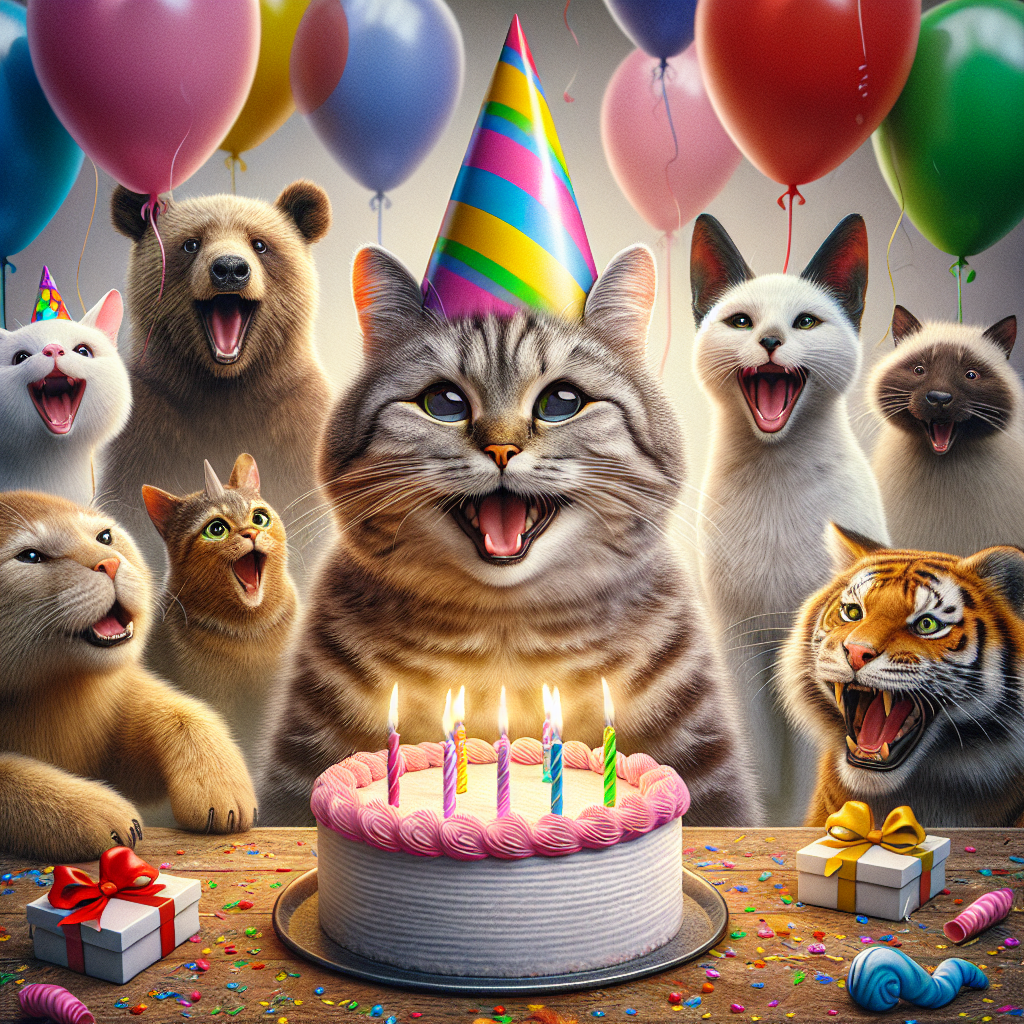

In [22]:
text = 'Image of a happy cat celebrating its birthday with its friends. The cat is wearing a party hat and there are balloons in the background. Photo realistic.'
file_path = '../data/cat_birthday.jpg'
agent.generate_image(text=text, target_file_name=file_path)
print('done generating file, lets display it')
img = Image.open(file_path)
display(img)

# Complex tasks using structured output

In [12]:
class Step(BaseModel):
    explanation: str
    output: str

class MathResponse(BaseModel):
    steps: list[Step]
    final_answer: str

In [13]:
instructions = 'You are a helpful math tutor. Guide the user through the solution step by step.'
text='how can I solve 8x + 7 = -23'
response = agent.chat(text, instructions=instructions, response_format=MathResponse)

In [35]:
# Create MathResponse object from string
math_response = from_json(response)
for step in math_response['steps']:
    print(step['explanation'])
    print(step['output'])

print(f'Final Answer: {math_response['final_answer']}')

To isolate the term with x, we first need to eliminate the constant on the left side of the equation by subtracting 7 from both sides.
8x + 7 - 7 = -23 - 7
This simplifies the equation to 8x = -30.
8x = -30
Next, we need to isolate x by dividing both sides of the equation by 8.
x = -30 / 8
Now we simplify -30 / 8 to its simplest form. We can divide both the numerator and the denominator by 2.
x = -15 / 4
We can also express -15/4 as a decimal or a mixed number if needed. -15/4 equals -3.75 or -3 3/4.
x = -3.75 or x = -3 3/4
Final Answer: x = -3.75 or x = -3 3/4
